In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#  palette=["#00af87", "#000000"]


In [2]:
df_glovo_ta = pd.read_csv(r'../../data/df_glovo_ta.csv')
df_glovo = pd.read_csv(r'../../data/df_glovo.csv')
df_ta = pd.read_csv(r'../../data/df_ta.csv')

In [3]:
#As in the glovo dataframe the rating is expressed in a percentage (1-100%), we transform the rating from tripadvisor (now 0.0 - 5.0) also to %.
def rating_to_percentage(rating):
    if pd.isnull(rating):
        return rating
    return int(rating * 20)

df_ta['Rating'] = df_ta['Rating'] .apply(rating_to_percentage)
df_ta['Rating'] = df_ta['Rating'] .apply(lambda x: str(int(x)) + '%' if not pd.isna(x) else x)

df_ta

,Unnamed: 0,Name,Cuisine_Type,Rating,Review_Count
0,0,Bella Venezia,['Italian'],100%,102
1,1,La Gastronomica Burgers,['Street Food'],100%,1694
2,2,BelleBuon,"['Italian', 'Neapolitan']",100%,3430
3,3,Desoriente,"['Asian', 'Japanese Fusion']",100%,302
4,4,Vrutal,"['Bar', 'Healthy']",100%,1036
...,...,...,...,...,...
9716,9716,Optimo Bar,"['Bar', 'Spanish']",100%,7
9717,9717,Artesanos Espai Gastronomic,"['Italian', 'Mexican']",80%,189
9718,9718,Marimorena BCN Tapas,[],100%,3
9719,9719,Intermezzo,[],100%,54


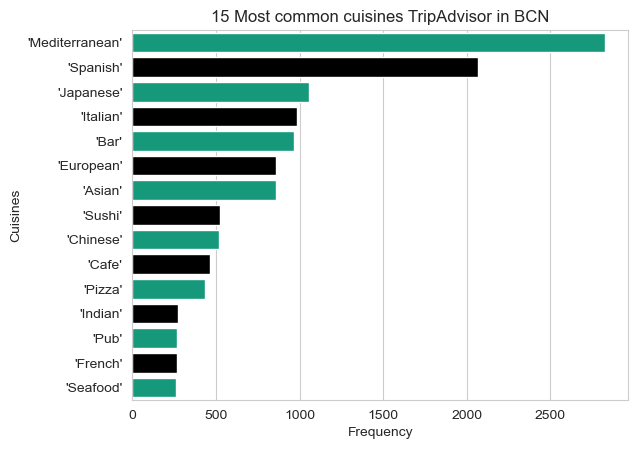

In [4]:
df_ta[['Cuisine1', 'Cuisine2']] = df_ta['Cuisine_Type'].str.strip("[]").str.split(", ", expand=True)

# Create a list of all cuisines by combining the values of 'Cuisine1' and 'Cuisine2'
cuisine_ta = df_ta['Cuisine1'].fillna('').tolist() + df_ta['Cuisine2'].fillna('').tolist()

# Count the frequency of each cuisine
cuisine_counts = pd.Series(cuisine_ta).value_counts()

# Plot the top 15 most frequent cuisines as a bar chart using Seaborn
sns.set_style("whitegrid")
sns.barplot(x=cuisine_counts.values[1:16], y=cuisine_counts.index[1:16], palette=["#00af87", "#000000"])
plt.xlabel('Frequency')
plt.ylabel('Cuisines')
plt.title('15 Most common cuisines TripAdvisor in BCN')
plt.show()



In [5]:
df_ta['Rating'] = df_ta['Rating'].replace("--", np.nan)
df_ta['Rating'] = df_ta['Rating'].replace("New", np.nan)
df_ta['Rating'] = df_ta['Rating'].str.strip('%').astype(float)
df_ta['Rating'] = df_ta['Rating'].astype(float)

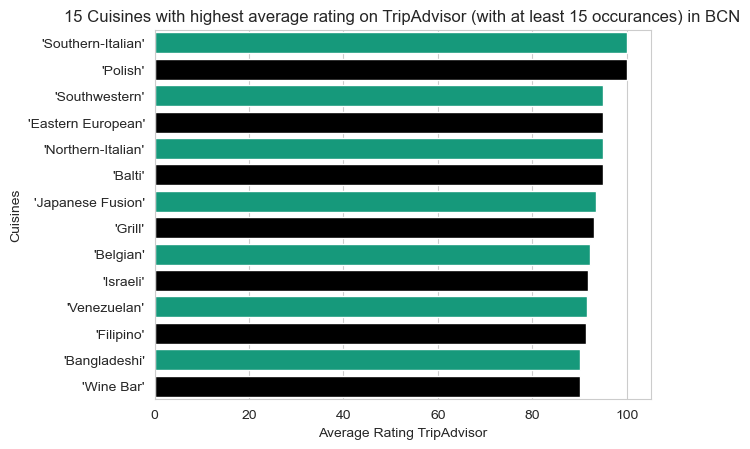

In [6]:
cuisine1_counts = df_ta['Cuisine1'].value_counts()
cuisine2_counts = df_ta['Cuisine2'].value_counts()
cuisines_counts = cuisine1_counts + cuisine2_counts
cuisines_counts = cuisines_counts[cuisines_counts >= 15].index

df_ta = df_ta[(df_ta['Cuisine1'].isin(cuisines_counts)) | (df_ta['Cuisine2'].isin(cuisines_counts))]

# Group by 'Cuisine1' and calculate mean 'Rating Glovo'
cuisine1_mean = df_ta.groupby('Cuisine1')['Rating'].mean()
cuisine2_mean = df_ta.groupby('Cuisine2')['Rating'].mean()
cuisines_mean = pd.concat([cuisine1_mean, cuisine2_mean], axis=1).mean(axis=1)
cuisines_mean.sort_values(ascending=False, inplace=True)
top_15_cuisines = cuisines_mean[1:16]


# Plot the chart
sns.set_style("whitegrid")
axe = sns.barplot(y=top_15_cuisines.index[1:16], x=top_15_cuisines.values[1:16], palette=["#00af87", "#000000"])
plt.xlabel('Average Rating TripAdvisor')
plt.ylabel('Cuisines')
plt.title('15 Cuisines with highest average rating on TripAdvisor (with at least 15 occurances) in BCN')
plt.xticks
plt.show()





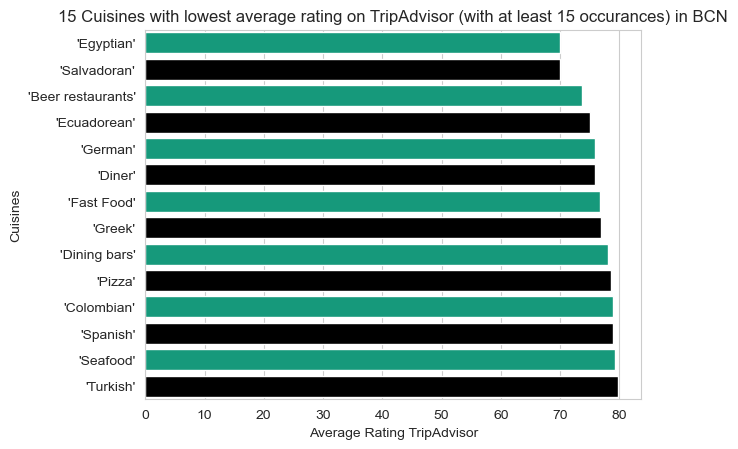

In [7]:
cuisine1_mean = df_ta.groupby('Cuisine1')['Rating'].mean()
cuisine2_mean = df_ta.groupby('Cuisine2')['Rating'].mean()
cuisines_mean = pd.concat([cuisine1_mean, cuisine2_mean], axis=1).mean(axis=1)
cuisines_mean.sort_values(ascending=True, inplace=True)
bottom_15_cuisines = cuisines_mean[1:16]

sns.set_style("whitegrid")
axe = sns.barplot(y=bottom_15_cuisines.index[1:16], x=bottom_15_cuisines.values[1:16], palette=["#00af87", "#000000"])
plt.xlabel('Average Rating TripAdvisor')
plt.ylabel('Cuisines')
plt.title('15 Cuisines with lowest average rating on TripAdvisor (with at least 15 occurances) in BCN')
plt.xticks
plt.show()

In [8]:
df_glovo[['Cuisine1', 'Cuisine2']] = df_glovo['Cuisine Style'].str.strip("[]").str.split(", ", expand=True)

In [9]:

# Create a list of all cuisines by combining the values of 'Cuisine1' and 'Cuisine2'
cuisine_glovo = df_glovo['Cuisine1'].fillna('').tolist() + df_glovo['Cuisine2'].fillna('').tolist()

# Count the frequency of each cuisine
cuisine_counts = pd.Series(cuisine_glovo).value_counts()



In [10]:
df_glovo['Rating Glovo'] = df_glovo['Rating Glovo'].replace("--", np.nan)
df_glovo['Rating Glovo'] = df_glovo['Rating Glovo'].replace("New", np.nan)
df_glovo['Rating Glovo'] = df_glovo['Rating Glovo'].str.strip('%').astype(float)
df_glovo['Rating Glovo'] = df_glovo['Rating Glovo'].astype(float)


In [36]:
df_ta['Rating'] = df_ta['Rating'].replace(-20, np.nan)

C:\Users\Tim_K\AppData\Local\Temp\ipykernel_3208\3137938884.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ta['Rating'] = df_ta['Rating'].replace(-20, np.nan)


In [12]:
cuisine1_counts_glovo = df_glovo['Cuisine1'].value_counts()
cuisine2_counts_glovo = df_glovo['Cuisine2'].value_counts()
cuisines_counts_glovo = cuisine1_counts_glovo + cuisine2_counts_glovo
cuisines_counts_glovo = cuisines_counts_glovo[cuisines_counts_glovo >= 15].index

# Group by 'Cuisine1' and calculate mean 'Rating Glovo'
cuisine1_mean_glovo = df_glovo.groupby('Cuisine1')['Rating Glovo'].mean()
cuisine2_mean_glovo = df_glovo.groupby('Cuisine2')['Rating Glovo'].mean()
cuisines_mean_glovo = pd.concat([cuisine1_mean_glovo, cuisine2_mean_glovo], axis=1).mean(axis=1)
cuisines_mean_glovo.sort_values(ascending=False, inplace=True)
top_15_cuisines_glovo = cuisines_mean_glovo[1:16]

83.75357510582313

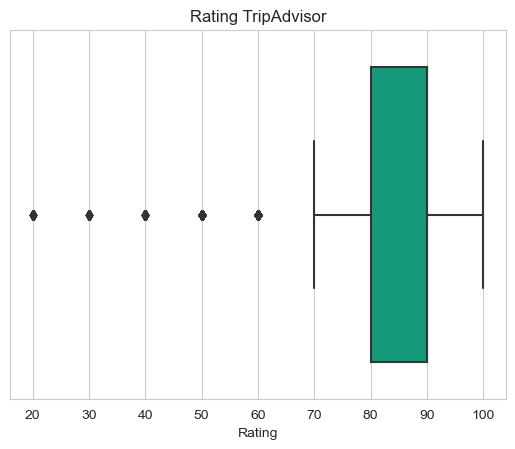

In [40]:
sns.boxplot(x=df_ta["Rating"], color="#00af87")
plt.title("Rating TripAdvisor")
plt.show()